# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | nambucca heads
Processing Record 4 of Set 1 | pangai
Processing Record 5 of Set 1 | aldinga beach
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | aral
Processing Record 9 of Set 1 | las heras
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | misratah
Processing Record 13 of Set 1 | zaozersk
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | bayan nur
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | karasu
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.09,77,100,21.18,TF,1718063590
1,port blair,11.6667,92.7500,28.02,89,75,6.17,IN,1718063590
2,nambucca heads,-30.6500,153.0000,17.00,54,30,1.17,AU,1718063590
3,pangai,-19.8000,-174.3500,27.06,57,40,5.66,TO,1718063590
4,aldinga beach,-35.2793,138.4604,17.07,87,98,8.50,AU,1718063590


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.09,77,100,21.18,TF,1718063590
1,port blair,11.6667,92.7500,28.02,89,75,6.17,IN,1718063590
2,nambucca heads,-30.6500,153.0000,17.00,54,30,1.17,AU,1718063590
3,pangai,-19.8000,-174.3500,27.06,57,40,5.66,TO,1718063590
4,aldinga beach,-35.2793,138.4604,17.07,87,98,8.50,AU,1718063590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

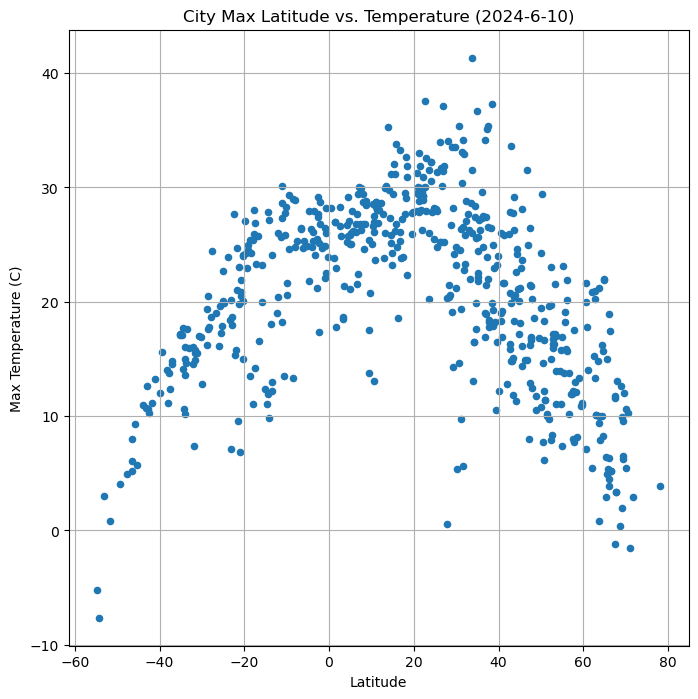

In [23]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat",y="Max Temp", marker= "o",grid=True, figsize=(8,8), title="City Max Latitude vs. Temperature (2024-6-10)", xlabel= "Latitude", ylabel= "Max Temperature (C)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

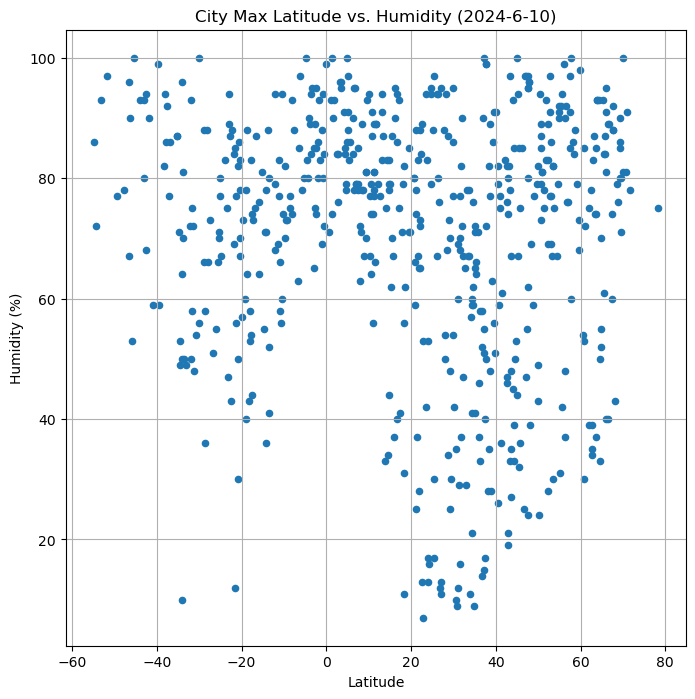

In [24]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat",y="Humidity", grid=True, figsize=(8,8), title="City Max Latitude vs. Humidity (2024-6-10)", xlabel= "Latitude", ylabel= "Humidity (%)")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

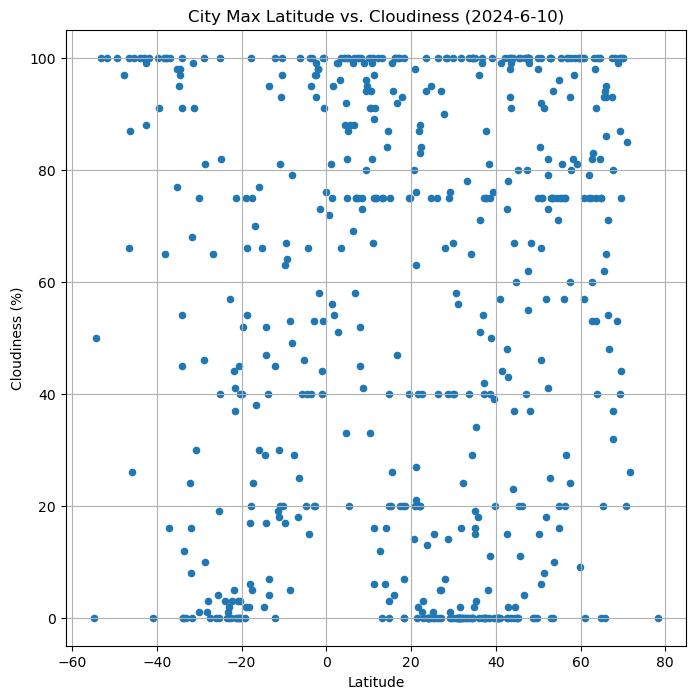

In [25]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat",y="Cloudiness", grid=True, figsize=(8,8), title="City Max Latitude vs. Cloudiness (2024-6-10)", xlabel= "Latitude", ylabel= "Cloudiness (%)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

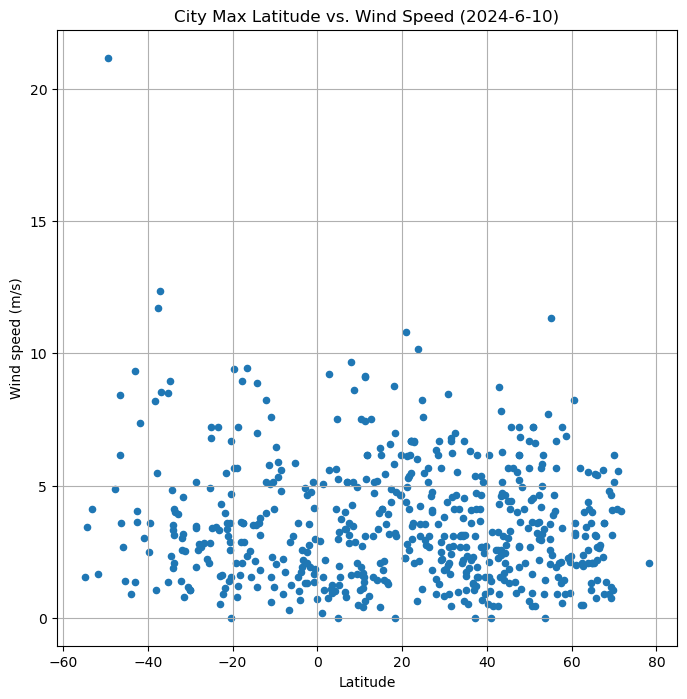

In [26]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat",y="Wind Speed", grid=True, figsize=(8,8), title="City Max Latitude vs. Wind Speed (2024-6-10)", xlabel= "Latitude", ylabel= "Wind speed (m/s)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Define a function to create Linear Regression plots
from scipy import stats
def plot_linear_regression(x_values, y_values, title, x_label, y_label, save_file = None):

    
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    #(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_df["Lat"],city_data_df["Max Temp"] )
    regress_values = x_values * slope + intercept
    
 
    plt.scatter(x_values, y_values, marker= "o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-", label= f'y = {slope:.2f}x + {intercept: .2f}')
    plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port blair,11.6667,92.7500,28.02,89,75,6.17,IN,1718063590
7,aral,40.5156,81.2636,26.06,26,0,2.12,CN,1718063590
9,tiksi,71.6872,128.8694,2.93,78,26,4.03,RU,1718063590
10,bethel,41.3712,-73.4140,21.63,61,44,0.45,US,1718063485
11,misratah,32.3754,15.0925,27.03,47,24,6.97,LY,1718063590


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.09,77,100,21.18,TF,1718063590
2,nambucca heads,-30.6500,153.0000,17.00,54,30,1.17,AU,1718063590
3,pangai,-19.8000,-174.3500,27.06,57,40,5.66,TO,1718063590
4,aldinga beach,-35.2793,138.4604,17.07,87,98,8.50,AU,1718063590
5,port alfred,-33.5906,26.8910,17.63,50,12,4.01,ZA,1718063590


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.69


C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


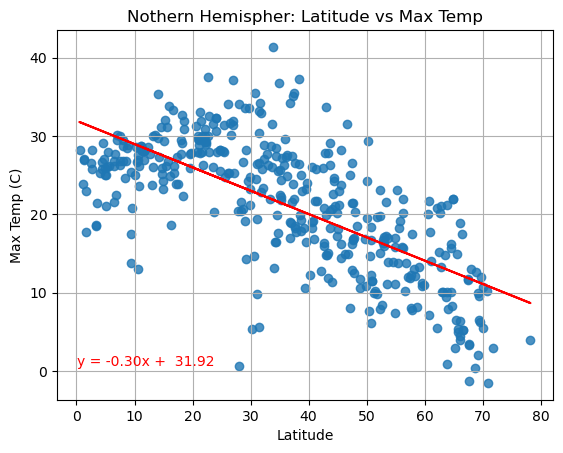

In [86]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(
    x_values, 
    y_values,
    "Nothern Hemispher: Latitude vs Max Temp",
    "Latitude", 
    "Max Temp (C)", 
    "../output_data/regressionNH.png"
)

north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Max Temp"])

print(f'The r-value is: {north_corr:.2f}')


The r-value is: 0.78


C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


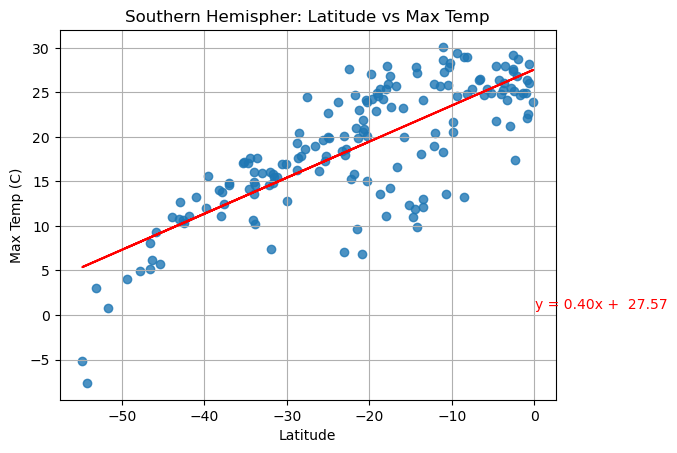

In [100]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(
    x_values, 
    y_values,
    "Southern Hemispher: Latitude vs Max Temp",
    "Latitude", 
    "Max Temp (C)", 
    "../output_data/regressionNH.png"
)

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Max Temp"])

print(f'The r-value is: {south_corr:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03


C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


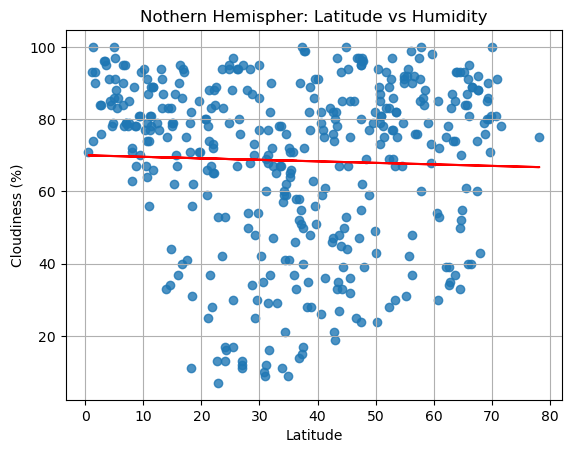

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(
    x_values, 
    y_values,
    "Nothern Hemispher: Latitude vs Humidity",
    "Latitude", 
    "Cloudiness (%)", 
    "../output_data/regressionNH.png"
)

north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Humidity"])

print(f'The r-value is: {north_corr:.2f}')

The r-value is: 0.07


C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


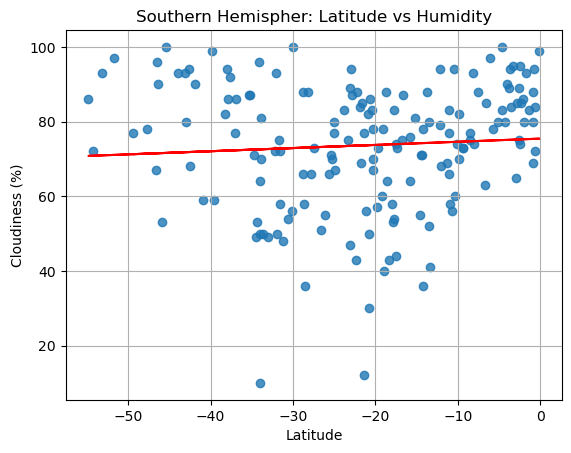

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(
    x_values, 
    y_values,
    "Southern Hemispher: Latitude vs Humidity",
    "Latitude", 
    "Cloudiness (%)", 
    "../output_data/regressionNH.png"
)

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Humidity"])

print(f'The r-value is: {south_corr:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


The r-value is: 0.02


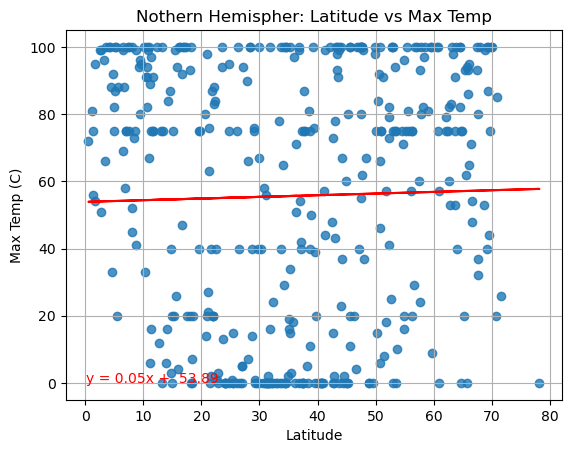

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(
    x_values, 
    y_values,
    "Nothern Hemispher: Latitude vs Cloudniess",
    "Latitude", 
    "Cloudiness (%)", 
    "../output_data/regressionNH.png"
)

north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Cloudiness"])

print(f'The r-value is: {north_corr:.2f}')

The r-value is: -0.10


C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


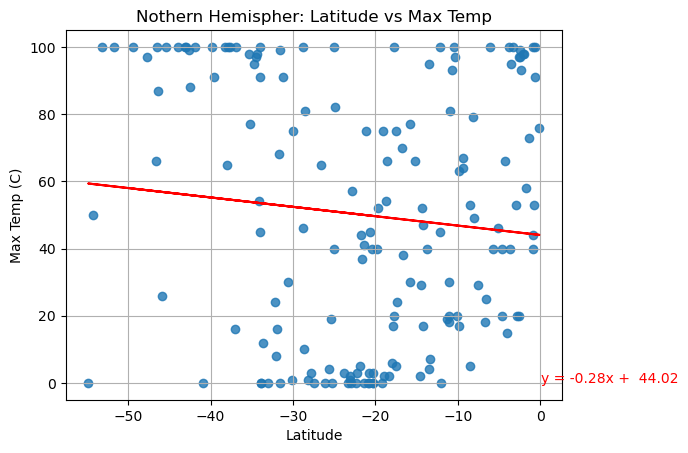

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(
    x_values, 
    y_values,
    "Nothern Hemispher: Latitude vs Cloudiness",
    "Latitude", 
    "Cloudiness (%)", 
    "../output_data/regressionNH.png"
)

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Cloudiness"])

print(f'The r-value is: {south_corr:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.08


C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


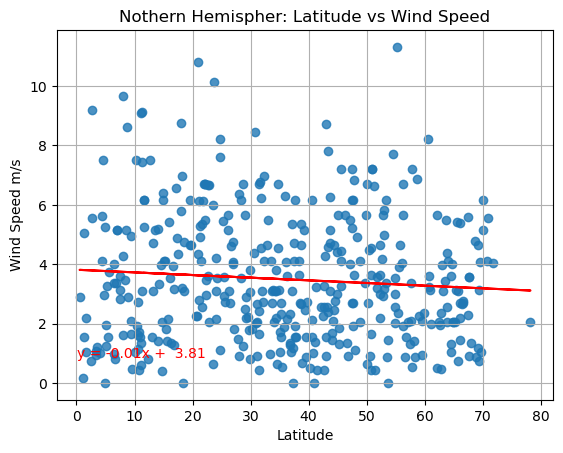

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(
    x_values, 
    y_values,
    "Nothern Hemispher: Latitude vs Wind Speed",
    "Latitude", 
    "Wind Speed m/s", 
    "../output_data/regressionNH.png"
)

north_corr = northern_hemi_df["Lat"].corr(northern_hemi_df["Wind Speed"])

print(f'The r-value is: {north_corr:.2f}')

C:\Users\maggi\AppData\Local\Temp\ipykernel_14872\231613602.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'y = {slope:.2f}x + {intercept: .2f}', (0.05, 0.95), xycoords= 'data', textcoords='offset points', color="red", ha="left", va="center")


The r-value is: -0.22


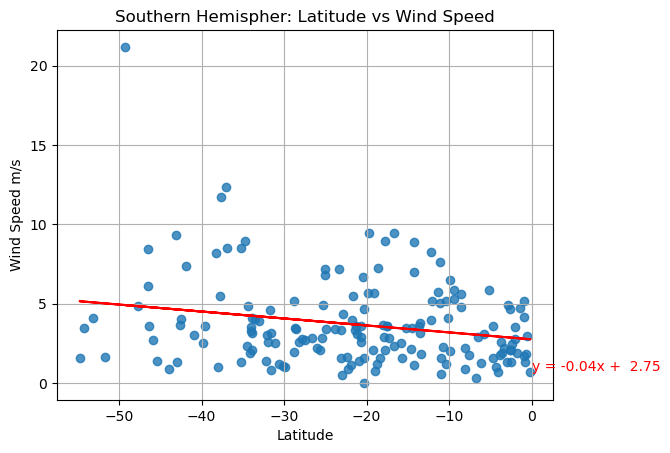

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(
    x_values, 
    y_values,
    "Southern Hemispher: Latitude vs Wind Speed",
    "Latitude", 
    "Wind Speed m/s", 
    "../output_data/regressionNH.png"
)

south_corr = southern_hemi_df["Lat"].corr(southern_hemi_df["Wind Speed"])

print(f'The r-value is: {south_corr:.2f}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE